# Report exercise 1

## ADVECTION EQUATION WITH GAUSSIAN AS INITIAL CONDITION

In [34]:
import numpy as np
import matplotlib.pyplot as plt

#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


## FTCS method

IndexError: index 4 is out of bounds for axis 0 with size 4

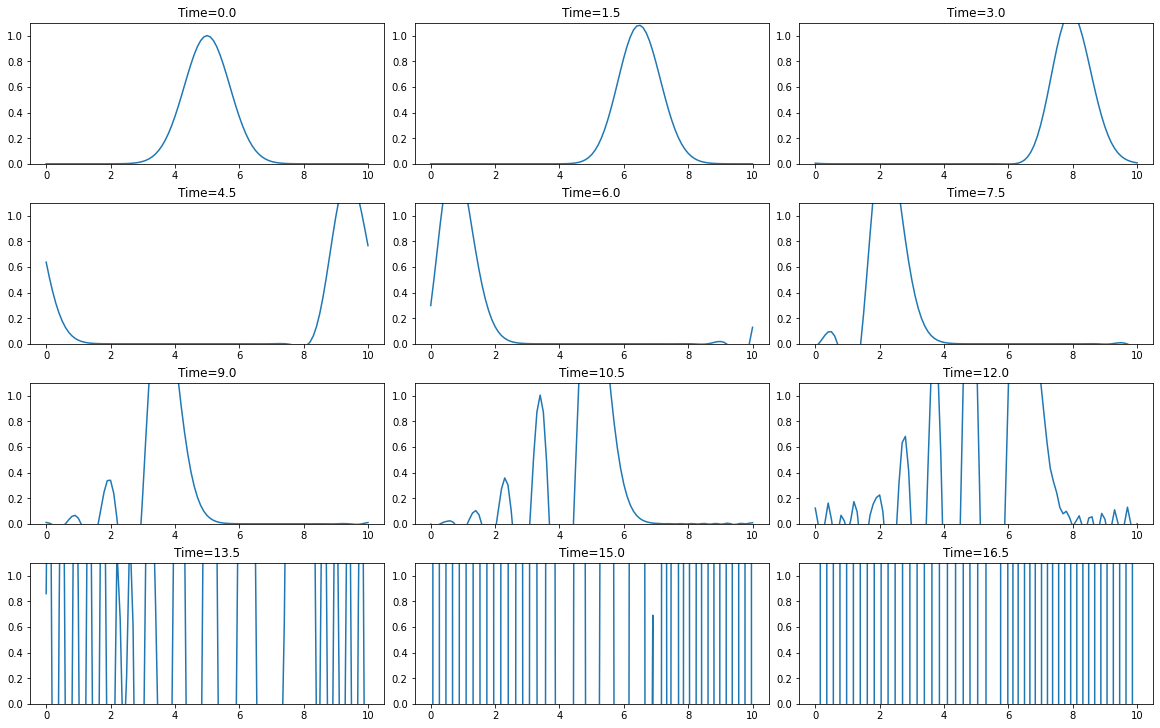

In [89]:
u_current = u_initial.copy()

# Initilize time and iteration counter
t = 0.0
i = 0

# plot every :
n_iterations_between_plots = 30
n_plots = t_final/dt / n_iterations_between_plots

# using the variable axs for multiple Axes
columns = 3
plt.rcParams["figure.figsize"] = (16,10)
fig, axs = plt.subplots( int(n_plots/columns), columns, layout='constrained')
#print(axs)

ax = axs[0][0]
#save the initial conditions
ax.plot(x, u_current)
ax.set_title('Time='+str(round(t,2)))
ax.set_ylim(0,1.1)
#plt.show()


j = 0
row = 0
#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))  #if I'm not using python I need to wrtie the boundary cond...  
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    
    #plot the current result and save in an image every 10 iterations
    if (i%n_iterations_between_plots==0):
        j = j+1
        if (j == columns): j = 0
        if (j%columns == 0): row = row +1
        ax = axs[row][j]
        #print(row, j)
        ax.plot(x, u_current)
        ax.set_title('Time='+str(round(t,2)))
        ax.set_ylim(0,1.1)
        
